¡Hola, Camilo!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Camilo! Has hecho un excelente trabajo con los ajustes, cada vez más cercas de convertirte en un analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas de hipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

# 1. Llamar las librerías

In [ ]:
#Llamar todas las librerías

In [ ]:
import pandas as pd 
import math as mt 
import numpy as np 
from scipy import stats as st 
from math import factorial 
import seaborn as sns  # Cargar todas las librerías
import matplotlib.pyplot as plt
import scipy.stats as stats

Se llaman los datos, se verifica la información del data set para visualizar de manera general la disposición de la información y evaluar las necesidades de ajsute de esta. 

In [ ]:
games_data= pd.read_csv("/datasets/games.csv")
games_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.
</div>

# 2. Conversión y ajuste de la información

# 2.1. Preparación de los datos

In [ ]:
#En este espacio modificaremos los nombres de las columnas para dejarlos en minúscula. 
columns_lower={"Name":"name","Platform":"platform","Year_of_Release":"year_of_release","Genre":"genre","NA_sales":"na_sales","EU_sales":"eu_sales","JP_sales":"jp_sales","Other_sales":"other_sales","Critic_Score":"critic_score","User_Score":"user_score","Rating":"rating"}
games_data.rename(columns=columns_lower,inplace=True)
games_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
#Acá convertiremos los datos de la columna "year_of_release" de float64 a int64 y los datos de la columna "user_score" de object a float64.
games_data["year_of_release"]=games_data["year_of_release"].astype("Int64")
games_data["user_score"] = pd.to_numeric(games_data["user_score"], errors="coerce")
games_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


 En el punto anterior, se convirtió el tipo de las columnas "year_of_release" y "user_score" a Int64 y float64, respectivamente. Este cambio se dio con el fin de manejar los datos, sin modificar la información contenida en cada columna. 
 
 De manera particular, para los datos de la columna "year_of_release" en los que no se contaba con un dato sobre la fecha de lanzamiento, se mantuvo el <NA>. Por otra parte, para no afectar las calificaciones promedio de la columna "user_score", se mantuvieron los valores ausentes comom NaN, sin generar ningún reemplazo de esta información por promedios de las calificaciones existentes, esto con el fin de no generar posibles afectaciones en la evaluación estadística de la información más adelante. 


# 2.2. Revisión de datos

In [ ]:
games_data.dropna(subset=['name'],inplace=True)                                                                                                                                                                                                                                                                                                                                         
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


# 2.3. Se verifica si existen filas duplicadas

In [ ]:
# Verificar si hay filas duplicadas en el DataFrame
duplicados = games_data.duplicated()

# Ver cuántas filas están duplicadas
print(f"Duplicated rows: {duplicados.sum()}")



Duplicated rows: 0


Se evidencia que no se cuentan con filas duplicadas, por lo que no es necesario hacer un proceso para una corrección alguna ante un eventual escenario de contar con valores duplicados. 

# 2.4. Revisión de datos para las columnas "critic_score", "user_score" y "rating". 

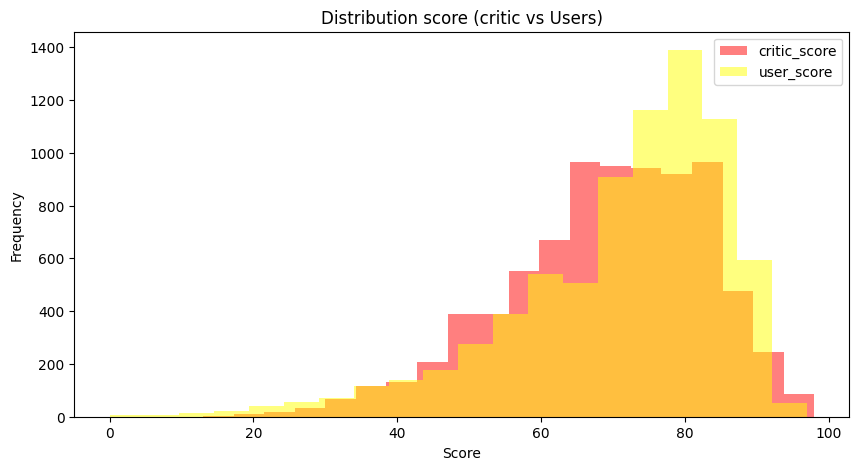

In [ ]:

#Se crea la figura
plt.figure(figsize=(10, 5))

#Histogramas superpuestos
plt.hist(games_data["critic_score"], bins=20, alpha=0.5, label="critic_score", color="red")
plt.hist(games_data["user_score"] * 10, bins=20, alpha=0.5, label="user_score", color="yellow")

#Personalización
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution score (critic vs Users)")
plt.legend()  

#Mostrar gráfico
plt.show()

Para la evaluación de qué medida estadística es más acertada para completar los datos ausentes en las columnas "critic_score" y "user_score", se implementó el uso de un histograma, esto con el fin de evidenciar factores como, sesgado de los datos y tendencia. 

En consideración de que se busca llenar los datos de ambas columnas y de que el rango de calificación de ambas son diferentes, dentro del código usado para la columna "user_score" se multiplicó por 10, para manejar el mismo rango de magnitud de la columna "critic_score" para la igualación de escalas. 

Una vez analizado el histograma, se evidencia en primera medida, una ligera asimetría negativa, lo que nos indica una distribución sesgada a la izquierda, así mismo, nos muestra que los datos se encuentran concentrado entre 60 y 90 y la poca presencia de valores de scores por debajo de 40, sin descartar que, aunque pocos, se encuentran algunos por debajo de dicho umbral. 

Por lo anterior, y en aras de evitar la influencia de los valores bajos atípicos dentro del ajuste de las columnas, se hará el uso de la mediana, así se maneja un ajuste de las columnas más conservador y evitar cualquier cambio en el sesgo. 

A continuación, calcularemos la mediana para las columnas "critic_score" y "user_score", luego la utilizaremos en las valores vacíos. 

Conociendo los valores de la mediana para cada una de las columnas, procedemos a reemplazar los valores NaN por los valores de mediana calculados. 

In [ ]:
median_critic_score=games_data["critic_score"].median()

print("The median of critic_score is:",median_critic_score)


The median of critic_score is: 71.0


In [ ]:
median_user_score=games_data["user_score"].median()

print("The median of user_score is:",median_user_score)

The median of user_score is: 7.5


Una vez conocida la mediana de los valores de las columnas "critic_score" y "user_score", procederemos a reemplazar estos valores en los espacios NaN de ambas columnas. 

Por otra parte, la columna "rating" sigue contando con una gran ausencia de calificación, para efectos de análisis, reemplazaremos los valores NaN por "RP" que, de acuerdo con la ESRB es un rating pending. 

In [ ]:
games_data["critic_score"]=games_data["critic_score"].fillna(median_critic_score)
games_data["user_score"]=games_data["user_score"].fillna(median_user_score)
games_data["rating"]=games_data["rating"].fillna("RP")

print(games_data.isnull().sum())

name                 0
platform             0
year_of_release    269
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64


Ahora, con los datos ajustados. Procederemos a crear la columna "total_sales" que contiene la suma de venta totales por cada juego en Estados Unidos ("na_sales"), Europa ("eu_sales"), Japón("jp_sales") y otras ventas ("other_sales"). 

In [ ]:
games_data["total_sales"]=games_data["na_sales"]+games_data["eu_sales"]+games_data["jp_sales"]+games_data["other_sales"]

games_data.head()
                                                                                            

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,RP,31.38


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de la base de datos y muy buen trabajo con la suma de todas las ventas. 

Además, realizaste un análisis de valores nulos 

# 3. Análisis de datos

Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

In [ ]:
release_per_year=games_data["year_of_release"].value_counts()
release_per_year=release_per_year.sort_index()
print(release_per_year)


1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


Es posible evidenciar un crecimiento conservador en el lanzamiento de juegos durante el periodo de 1980 - 1993, posteriormente, en el periodo 1994 - 2011 se presenta un crecimiento siginificativo en el lanzamiento de video juegos, para después dar inicio a una ralentización en la producción de video juegos, evidenciándose una caída prominente en el periodo 2012 - 2016.  

Ahora, se agruparán las ventas por plataforma para visualizar sus características de ventas de manera general, se ilustrará en un diagrama de barras para facilidad de interpretación. 

In [ ]:
platform_sales=games_data.groupby("platform")["total_sales"].sum().reset_index()
platform_sales = platform_sales.sort_values(by="total_sales", ascending=False)
print(platform_sales)

   platform  total_sales
16      PS2      1255.77
28     X360       971.42
17      PS3       939.65
26      Wii       907.51
4        DS       806.12
15       PS       730.86
6       GBA       317.85
18      PS4       314.14
19      PSP       294.05
13       PC       259.52
2       3DS       259.00
29       XB       257.74
5        GB       255.46
11      NES       251.05
10      N64       218.68
23     SNES       200.04
7        GC       198.93
30     XOne       159.32
0      2600        96.98
27     WiiU        82.19
20      PSV        54.07
21      SAT        33.59
8       GEN        28.35
3        DC        15.95
22      SCD         1.86
12       NG         1.44
25       WS         1.42
24     TG16         0.16
1       3DO         0.10
9        GG         0.04
14     PCFX         0.03


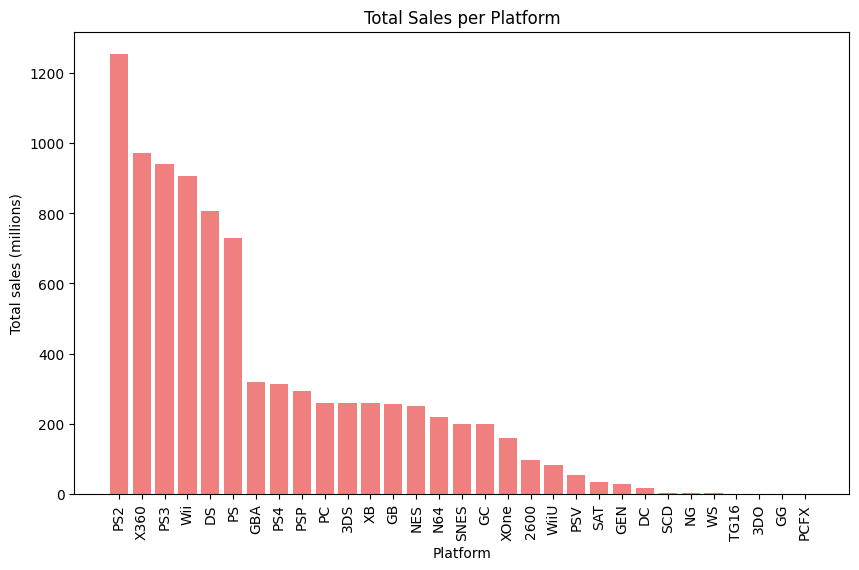

In [ ]:
plt.figure(figsize=(10, 6)) 
plt.bar(platform_sales['platform'], platform_sales['total_sales'], color='lightcoral')

plt.xlabel('Platform')
plt.ylabel('Total sales (millions)')
plt.title('Total Sales per Platform')

plt.xticks(rotation=90)

plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo, esta gráfica nos ayuda a entender el comportamiento del mercado de videojuegos en el tiempo




Se evidencia que las plataformas PS2, X360, PS3, Wii, DS y PS lideran las ventas por plataforma, y que, a partir de ello la viariación es pronunciada. Por lo anteiror, tomaremos estas 6 plataformas para construir la distribución basada en los datos por cada año. 

In [ ]:
top_platforms = platform_sales.sort_values(by="total_sales", ascending=False).head(6)["platform"]
print(top_platforms)

16     PS2
28    X360
17     PS3
26     Wii
4       DS
15      PS
Name: platform, dtype: object


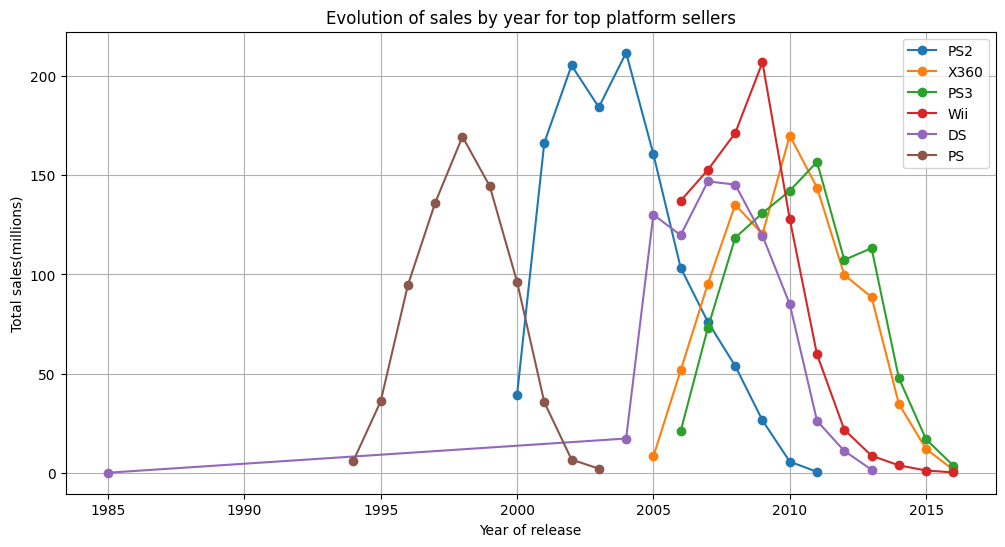

In [ ]:
#Se filtran los datos solo para estas plataformas
filtered_data = games_data[games_data["platform"].isin(top_platforms)]

#Se agrupan por año y plataforma, sumando las ventas
sales_by_year = filtered_data.groupby(["year_of_release", "platform"])["total_sales"].sum().reset_index()

#Ahora, se realiza lo siguiente para la gráfica
plt.figure(figsize=(12, 6))

for platform in top_platforms:
    yearly_sales = sales_by_year[sales_by_year["platform"] == platform]
    plt.plot(yearly_sales["year_of_release"], yearly_sales["total_sales"], marker="o", label=platform)

#Personalización del gráfico
plt.xlabel("Year of release")
plt.ylabel("Total sales(millions)")
plt.title("Evolution of sales by year for top platform sellers")
plt.legend()
plt.grid(True)


plt.show()


Con la distribución mostrada para cada plataforma es posible exrtraer información particular: 

- PS2: con un crecimiento exponencial durante los primeros años y una venta máxima cerca al 2005,que posterior a ello dio lugar a un decrecimiento exponencial en ventas. Manteniendo su pico histórico de ventas entre el 2000 y 2005.
- X360: si bien su inicio en ventas se dio en el 2005, sólo hasta el 2010 alcanzó su histórico en ventas. 
- PS3: de manera similar a X360, requirió un periodo de aproximadamente 5 años para alcanzar su histório en ventas. 
- Wii:contó con un corto periodo en su alza en ventas, dando inicio de manera prematura a la recesión en ventas. 
- DS: siendo ieista plataforma el caso quizás más particular, con el incio en ventas en el año 1985 y unas ventas conservadoramente exponenciales hasta el 2004, tuvieron un alza en ventas durante el 2004 y 2006, para iniciar un decenso en ventas posterior a ello. 
- PS: ventas estándar con un histórico máximo cerca al 2008. 

In [ ]:
#Se eliminan las filas sin año de lanzamiento
games_data = games_data.dropna(subset=["year_of_release"])

#Hallaremos el primer y último año de ventas para cada plataforma
platform_lifetime = games_data.groupby("platform")["year_of_release"].agg(["min", "max"]).reset_index()
platform_lifetime.columns = ["platform", "first_year", "last_year"]


#Definiremos el último año en la base de datos
latest_year = games_data["year_of_release"].max()

#Identificaremos plataformas que han desaparecido (última venta antes del año más reciente)
disappeared_platforms = platform_lifetime[platform_lifetime["last_year"] < latest_year]
disappeared_platforms = disappeared_platforms.copy()

#Calcularemos la duración de vida de cada plataforma
disappeared_platforms.loc[:,"platform_life"] = disappeared_platforms["last_year"] - disappeared_platforms["first_year"]

#Calcularemos el tiempo promedio de vida de una plataforma
average_platform_life = disappeared_platforms["platform_life"].mean()

#Calcularemos el tiempo promedio de aparición de nuevas plataformas
platform_appearance_gaps = platform_lifetime["first_year"].diff().dropna()
average_appearance_time = platform_appearance_gaps.mean()

print("Discontinued Platforms: \n", disappeared_platforms)
print("Average lifespan of a platform:", round(average_platform_life, 2), "years")
print("Average time between the release of new platforms:", round(average_appearance_time, 2), "years")


Discontinued Platforms: 
    platform  first_year  last_year  platform_life
0      2600        1980       1989              9
1       3DO        1994       1995              1
3        DC        1998       2008             10
4        DS        1985       2013             28
5        GB        1988       2001             13
6       GBA        2000       2007              7
7        GC        2001       2007              6
8       GEN        1990       1994              4
9        GG        1992       1992              0
10      N64        1996       2002              6
11      NES        1983       1994             11
12       NG        1993       1996              3
14     PCFX        1996       1996              0
15       PS        1994       2003              9
16      PS2        2000       2011             11
19      PSP        2004       2015             11
21      SAT        1994       1999              5
22      SCD        1993       1994              1
23     SNES        1990 

Ahora bien, en función de que debemos tomar los datos que nos permitan construir un modelo para el 2017, tendremos en consideración las siguientes actividades (que ya han sido desarrolladas previamente): 
   - Las plataformas con más ventas. 
   - El último año de lanzamiento de cada plataforma. 
   - El tiempo promedio de vida de una plataforma.

Haciendo una evaluación integral de estas variables, usaremos el dataframe "filtreted_data" (El cual contiene las plataformas con mayores índices de ventas) para considerar, de este data frame, las plataformas con años de lanzamiento de videojuegos mayores o iguales a 2009, ya que en consideración de que requerimos hacer un análisis para el 2017, con datos del 2016, y el tiempo promedio de una plataforma es de 7 años, lo que nos da como resultado 2009, aplicaremos esta condición a nuestro dataframe. 

In [ ]:
best_data= filtered_data[filtered_data["year_of_release"] >= 2009]
best_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3729 entries, 3 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             3729 non-null   object 
 1   platform         3729 non-null   object 
 2   year_of_release  3729 non-null   Int64  
 3   genre            3729 non-null   object 
 4   na_sales         3729 non-null   float64
 5   eu_sales         3729 non-null   float64
 6   jp_sales         3729 non-null   float64
 7   other_sales      3729 non-null   float64
 8   critic_score     3729 non-null   float64
 9   user_score       3729 non-null   float64
 10  rating           3729 non-null   object 
 11  total_sales      3729 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 382.4+ KB


Dicho esto, trabajaremos entonces con las siguientes plataformas: 

In [ ]:
unique_platforms = best_data['platform'].unique()
print(unique_platforms)

['Wii' 'X360' 'PS3' 'DS' 'PS2']


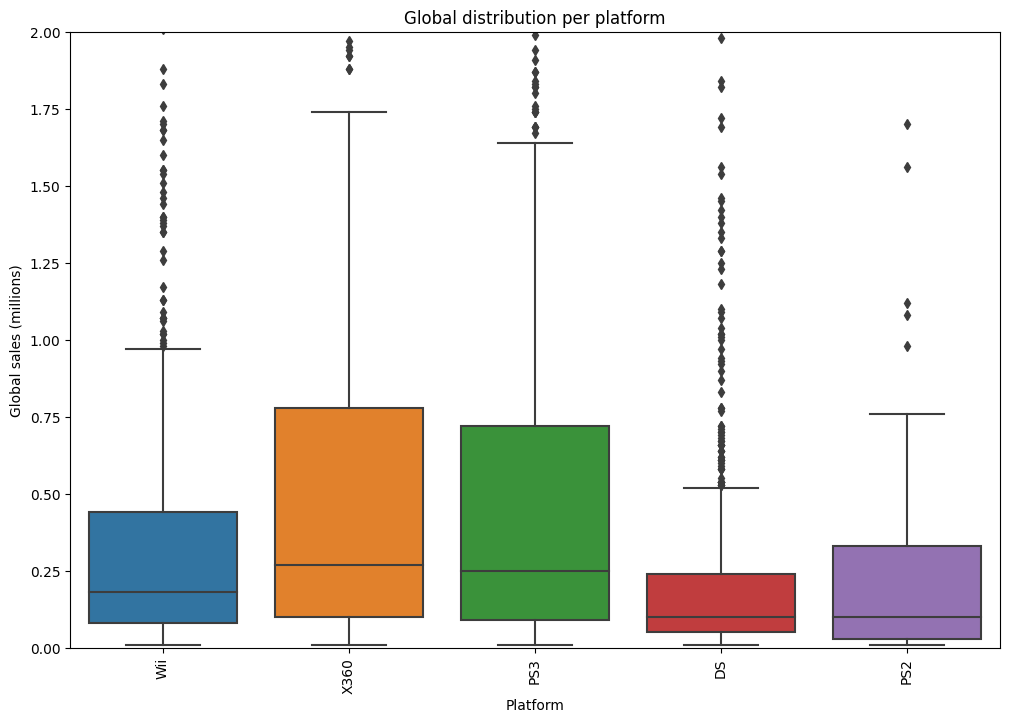

  platform  average_sales  median_sales
0       DS       0.267352          0.10
1      PS2       0.230426          0.10
2      PS3       0.683796          0.25
3      Wii       0.554761          0.18
4     X360       0.787207          0.27


In [ ]:
#Creamos el diagrama de caja (boxplot)
plt.figure(figsize=(12, 8))
sns.boxplot(data=best_data, x="platform", y="total_sales")

#Mejoramos la legibilidad del gráfico
plt.xticks(rotation=90)  # Rotar etiquetas para mejor visualización
plt.title("Global distribution per platform")
plt.xlabel("Platform")
plt.ylabel("Global sales (millions)")
plt.ylim(0, 2)

#Mostramos gráfico
plt.show()

#Calculamos la media y mediana de las ventas totales por plataforma
platform_sales_stats = best_data.groupby("platform")["total_sales"].agg(["mean", "median"]).reset_index()

#Renombramos columnas para mayor claridad
platform_sales_stats.columns = ["platform", "average_sales", "median_sales"]

#Mostramos resultados
print(platform_sales_stats)

<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el desarrollo de la gráfica de cajas, este tipo de gráficos nos ayuda a comparar resultados de manera precisa. Solamente recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>

Con la anterior información obtuvimos que, de estas cinco plataformas que filtramos para el análisis, hay plataformas con ventas anuales mayores a otras, así: 

1. Xbox 360 - X360
2. Play Station 3 - PS3
3. Nintendo Wii - Wii
4. Nintendo DS
5. Play Station 2 - PS2

A partir de esto, podemos confirmar que, si bien no hay una diferencia muy alta entre el promedio de ventas entre una y otra plataforma, sí hay una diferencia considerable en el promedio de ventas anuales entre la plataforma con un menor promedio (Play Station 2) y la plataforma con mayor promedio (Xbox 360). 

Adicionalmente, para todas las plataformas se presentan valores atípicos de venta, especialmente para Nintendo Wii y Nintendo DS.

Ahora, analizaremos como las críticas por usuarios y profesionales (user_score and critic_score) inciden en el comportamiento de las ventas, en este caso de la plataforma Play Statio 3 (PS3). 

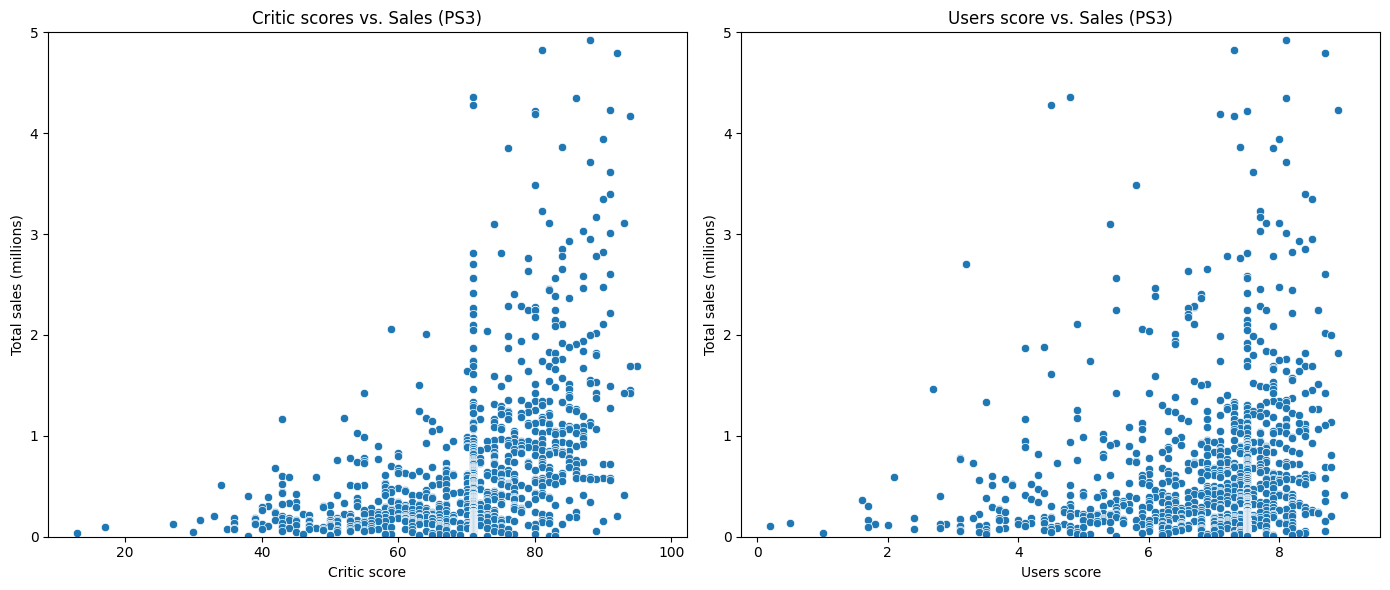

Correlation between critic score and sales: 0.40
Correlation between users score and sales: 0.04


In [ ]:
#Filtramos solo los juegos de PS3
ps3_games = games_data[games_data["platform"] == "PS3"].copy()

#Creamos gráficos de dispersión
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#Gráfico de dispersión para Critic_Score vs Total_Sales
sns.scatterplot(x=ps3_games["critic_score"], y=ps3_games["total_sales"], ax=axes[0])
axes[0].set_title("Critic scores vs. Sales (PS3)")
axes[0].set_xlabel("Critic score")
axes[0].set_ylabel("Total sales (millions)")
axes[0].set_ylim(0,5)

#Gráfico de dispersión para User_Score vs Total_Sales
sns.scatterplot(x=ps3_games["user_score"], y=ps3_games["total_sales"], ax=axes[1])
axes[1].set_title("Users score vs. Sales (PS3)")
axes[1].set_xlabel("Users score")
axes[1].set_ylabel("Total sales (millions)")
axes[1].set_ylim(0,5)

plt.tight_layout()
plt.show()

#Calculamos la correlación
correlation_critic = ps3_games["critic_score"].corr(ps3_games["total_sales"])
correlation_user = ps3_games["user_score"].corr(ps3_games["total_sales"])

print(f"Correlation between critic score and sales: {correlation_critic:.2f}")
print(f"Correlation between users score and sales: {correlation_user:.2f}")

<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente forma de analizar la relación entre las ventas y las scores

Ahora analizaremos el orden de magnitud de las correlaciones entre las críticas hechas por usuarios y profesionales y su incidencia en las ventas de la plataforma Play Statios 3 (PS3)

In [ ]:
if 0 < correlation_critic < 0.3:
    print("The Correlation Between Critic Scores and Sales is: Insignificant")
elif 0.3 <= correlation_critic < 0.5:
    print("The Correlation Between Critic Scores and Sales is: Moderated")
elif 0.5 <= correlation_critic < 1:
    print("The Correlation Between Critic Scores and Sales is: Strong")
else:
    print("Not determinated")


if 0 < correlation_user < 0.3:
    print("The Correlation Between User Scores and Sales is: Insignificant")
elif 0.3 <= correlation_user < 0.5:
    print("The Correlation Between User Scores and Sales is: Moderated")
elif 0.5 <= correlation_user < 1:
    print("The Correlation Between User Scores and Sales is: Strong")
else:
    print("Not determinated")

The Correlation Between Critic Scores and Sales is: Moderated
The Correlation Between User Scores and Sales is: Insignificant


In [ ]:
ps3_games= best_data[best_data["platform"]=='PS3']

#Ahora obtenemos los juegos de PS3 que están disponibles en otras plataformas 
games_in_other_platforms = best_data[best_data['name'].isin(ps3_games['name']) & (best_data['platform'] != 'PS3')]

#Agrupamos las ventas por nombre del juego y plataformas diferentes a PS3
sales_by_game_platform = games_in_other_platforms.groupby(['name', 'platform'])['total_sales'].sum().reset_index()

#Agrupamos las ventas de PS3 para poderlas comparar con otras plataformas
ps3_sales = ps3_games.groupby(['name', 'platform'])['total_sales'].sum().reset_index()

#Unificamos dataframes (PS3 y otras plataformas) 
sales_by_game_platform = pd.merge(sales_by_game_platform, ps3_sales, on='name',suffixes=("_others","_ps3"))

#Verificamos las primeras filas de los datos
sales_by_game_platform.info()
sales_by_game_platform.head(40)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 0 to 987
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                988 non-null    object 
 1   platform_others     988 non-null    object 
 2   total_sales_others  988 non-null    float64
 3   platform_ps3        988 non-null    object 
 4   total_sales_ps3     988 non-null    float64
dtypes: float64(2), object(3)
memory usage: 46.3+ KB


,name,platform_others,total_sales_others,platform_ps3,total_sales_ps3
0,2010 FIFA World Cup South Africa,Wii,0.43,PS3,1.23
1,2010 FIFA World Cup South Africa,X360,0.85,PS3,1.23
2,2014 FIFA World Cup Brazil,X360,0.43,PS3,0.61
3,50 Cent: Blood on the Sand,X360,0.21,PS3,0.20
4,Ace Combat: Assault Horizon,X360,0.49,PS3,0.74
5,Adventure Time: Explore the Dungeon Because I ...,X360,0.08,PS3,0.04
6,Adventure Time: Finn & Jake Investigations,X360,0.09,PS3,0.08
7,Afro Samurai,X360,0.23,PS3,0.20
8,Air Conflicts: Secret Wars,X360,0.09,PS3,0.19
9,Alice: Madness Returns,X360,0.49,PS3,0.58


Con lo anterior podemos concluir que son 988 juegos de la Play Station 3 (ps3) que son comercializados en otras plataformas. Sin embargo, no se marca una tendencia clara en cuanto a que en los juegos de Play Station 3 tengan mayores en ventas en su propia plataforma, puesto que hay casos en los que su comercialización es mayor en otras plataformas. Sin embargo, sí podemos concluir que son cerca de 1000 juegos de Play Station 3 que están presentes en otras plataformas. 

Ahora, revisaremos el comportamiento de los juegos en función del género. Revisaremos qué generos son más rentables. 

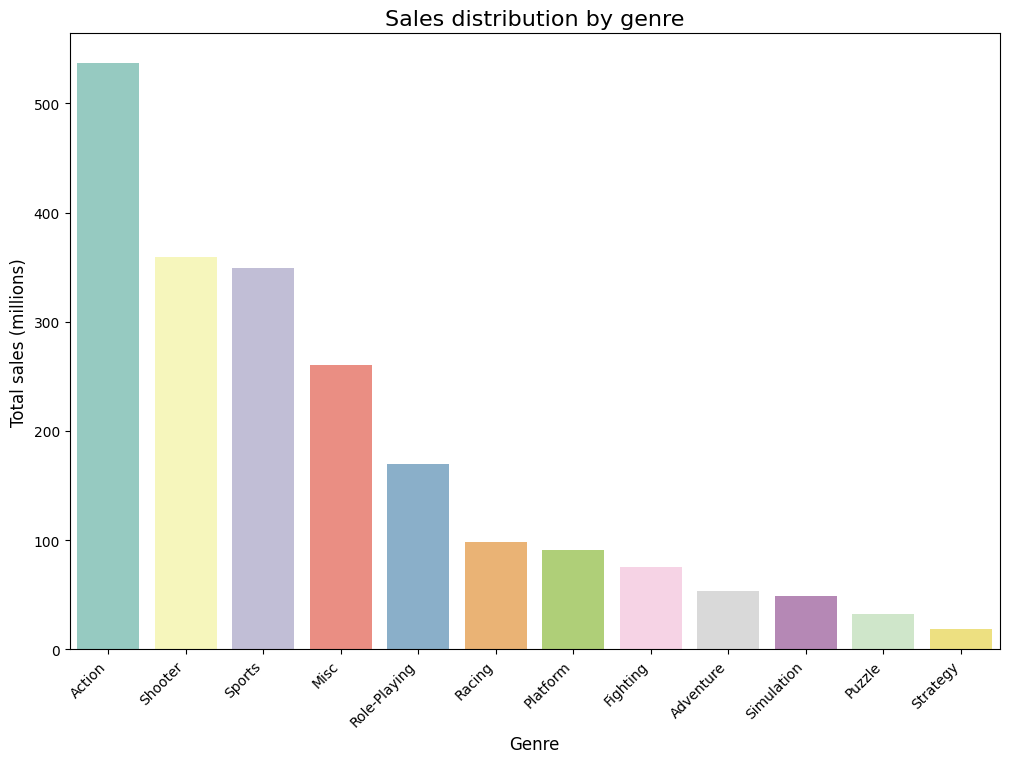

           genre  total_sales
0         Action       537.15
8        Shooter       358.94
10        Sports       349.21
3           Misc       260.53
7   Role-Playing       170.18
6         Racing        98.77
4       Platform        90.88
2       Fighting        75.78
1      Adventure        53.29
9     Simulation        49.19
5         Puzzle        32.47
11      Strategy        18.70


In [ ]:
# Agrupamos los datos por género y sumar las ventas totales
sales_by_genre = best_data.groupby('genre')['total_sales'].sum().reset_index()

# Ordenamos los géneros por ventas totales de mayor a menor
sales_by_genre = sales_by_genre.sort_values(by='total_sales', ascending=False)

# Visualización: Diagrama de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=sales_by_genre, x='genre', y='total_sales', palette='Set3')

# Títulos y etiquetas
plt.title('Sales distribution by genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Total sales (millions)', fontsize=12)

# Rotar las etiquetas del eje X para que se lean mejor
plt.xticks(rotation=45, ha="right")

# Mostrar el gráfico
plt.show()

# Verificar los primeros datos agrupados
print(sales_by_genre.head(12))

Evidentemente el género de acción se lleva el primer lugar en ventas con una diferencia notoria sobre los otros géneros, por lo que la rentabilidad mayor se daría con la promoción y venta de esté género. 

Para los últimos géneros (Puzzle y Strategy) podemos presumir la dificultad de su comercialización y la gran diferencia en comparación con el género más comercializado. 

# 4. Perfil de usuario por región

Ahora, perfilaremos las regiones (Norte América, Europa y Japón) para analizar su comportamiento en el consumo de video juegoos ¿Qué plataformas son las más usadas? ¿Cuáles son los géneros más jugados? Y si las clasificaciones ESRB afectan el comportamiento de ventas en cada región. 

En consideración de que estamos realizando un análisis para un lanzamiento para el 2017, seguiremos usando el dataframe best_data, que evalúa las plataformas que se encuentran dentro de los parámetros necesarios para la evaluación que estamos realizando (Las plataformas con más ventas, el último año de lanzamiento de cada plataforma, el tiempo promedio de vida de una plataforma)

  platform      NA      EU     JP
0       DS  120.61   53.89  52.11
1      PS2   11.68    6.61   2.74
2      PS3  291.90  255.00  68.29
3      Wii  235.75  124.22  34.32
4     X360  408.18  196.72   7.41


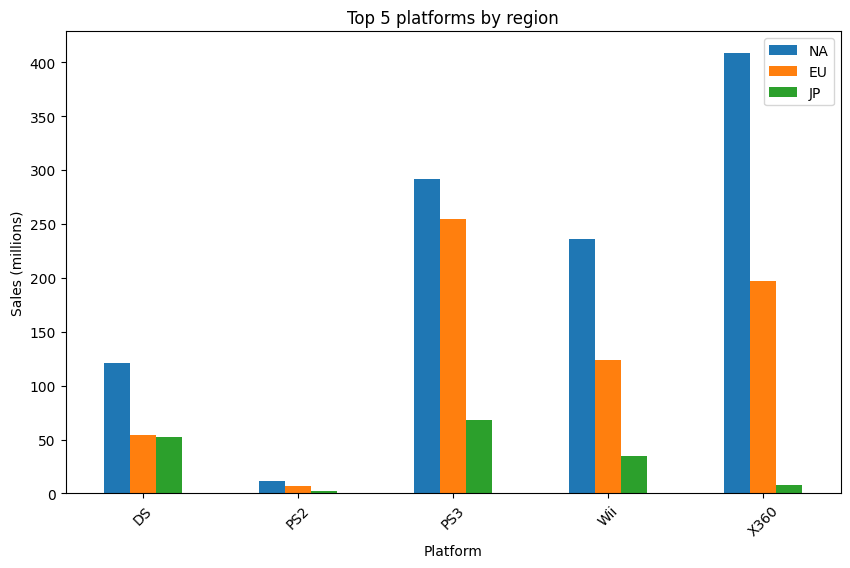

In [ ]:
#Agrupamos por plataforma y sumamos las ventas en cada región
top_platforms_na = best_data.groupby('platform')['na_sales'].sum().nlargest(5)
top_platforms_eu = best_data.groupby('platform')['eu_sales'].sum().nlargest(5)
top_platforms_jp = best_data.groupby('platform')['jp_sales'].sum().nlargest(5)

#Convertimos a DataFrame
top_platforms = pd.DataFrame({
    'NA': top_platforms_na,
    'EU': top_platforms_eu,
    'JP': top_platforms_jp
}).reset_index()

#Visualizamos los datos
print(top_platforms)

top_platforms.plot(x= 'platform', kind='bar', figsize=(10, 6))
plt.title('Top 5 platforms by region')
plt.xlabel('Platform')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=45)
plt.show()

          genre      NA      EU     JP
0        Action  261.10  174.96  38.14
1          Misc  146.29   73.14  15.43
2        Racing     NaN   41.67    NaN
3  Role-Playing   72.25     NaN  47.44
4       Shooter  192.73  115.31   9.98
5        Sports  183.55  109.98  17.00


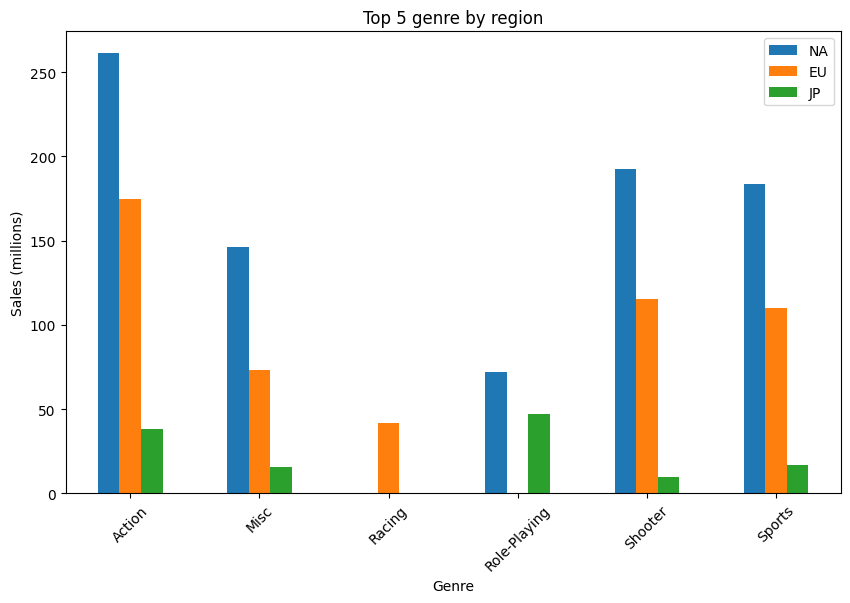

In [ ]:
top_genre_na = best_data.groupby('genre')['na_sales'].sum().nlargest(5)
top_genre_eu = best_data.groupby('genre')['eu_sales'].sum().nlargest(5)
top_genre_jp = best_data.groupby('genre')['jp_sales'].sum().nlargest(5)

#Convertimos a DataFrame
top_platforms = pd.DataFrame({
    'NA': top_genre_na,
    'EU': top_genre_eu,
    'JP': top_genre_jp
}).reset_index()

#Visualizamos los datos
print(top_platforms)

top_platforms.plot(x= 'genre', kind='bar', figsize=(10, 6))
plt.title('Top 5 genre by region')
plt.xlabel('Genre')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=45)
plt.show()

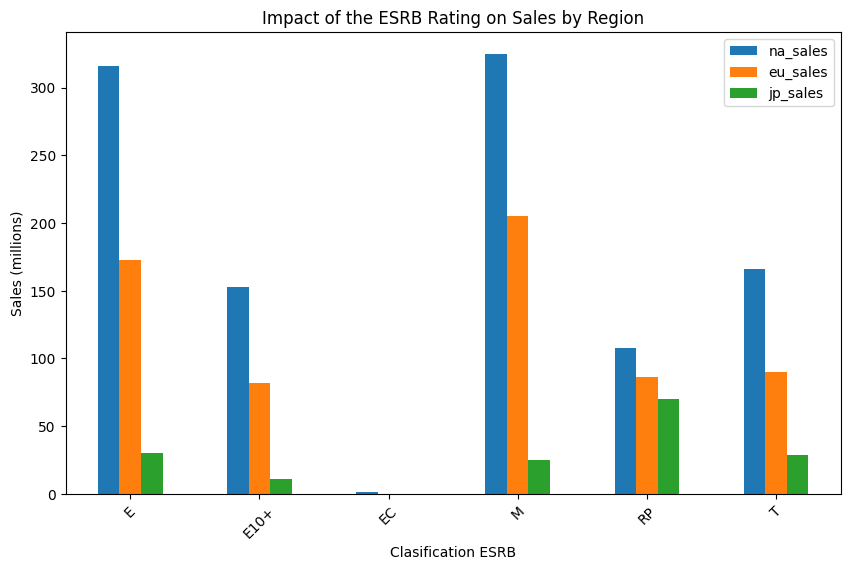

,na_sales,eu_sales,jp_sales
rating,,,
E,315.56,172.92,30.16
E10+,152.50,82.15,11.27
EC,1.23,0.00,0.00
M,324.77,205.12,25.12
RP,107.98,85.98,69.93
T,166.08,90.27,28.39


In [ ]:
esrb_sales = best_data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

esrb_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Impact of the ESRB Rating on Sales by Region')
plt.xlabel('Clasification ESRB')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=45)
plt.show()

#Visualizamos los datos
esrb_sales.head(10)

Con los resultados obtenidos, haremos un perfil para cada región: 

1. Norte América. 
- Gran preferencia por los gráficos y demás servicios ofrecidos por Xbox 360, siendo esta con más de 400.000.000 la más vendida en esta región. Play Station 3 se ubica en segundo lugar con pooco más de 291.000.000 de ventas. 
- Los juegos de acción y disparos son los preferidos por los Norte Americanos, siendo el género de acción el más consumido con una gran diferencia. No se deben descartar los juegos de deportes, estando estos muy cerca al género de disparos. Para el caso de racing, no se presentan datos de consumo de este género en esta región.  
- ¡En Norte América se presenta un consumo de video juegos desde la adolecencia! A partir de los 17 años, se presenta una predominancia en el consumo de los videojuegos, además, el consumo de videojuegos a cualquier edad también es común en esta región. 

2. Europa.
- Aquí se presenta un comportamiento de consumos menos pronunciado, siendo Play Station 3, con 255.000.000 de ventas la plataforma más adquirida por los habitantes del viejo continente. Sin embargo, Xbox 360 está justo en segundo lugar, con una diferencia no muy grande a las ventas de Play Station 3. 
- Al igual que Norte América, los europeos prefieren los juegos de acción, y en segundo y tercer los géneros de disparos y deportes. Sin embargo, se presenta una diferencia considerable de consumos entre la región de Norte América y Europa. 
- Se presenta un comportamiento similar al de Norte América, eso sí, en menor proporción. 

3. Japón. 
- En general los consumos de las 5 principales plataformas está muy por debajo en comparación con Norte América y Europa, sin embargo, se destaca el uso de Play Station 3, estando Nintendo DS por detrás, con una diferencia de más de 10.000.000 de ventas en comparación al primer lugar. 
- El protagista en esta región es totalmente diferente al género predominante en las otras dos regiones, los juegos de roles toman la delantera en cuestión de consumo en la región oriental, sin embargo, algunos japoneses prefieren también el género de acción, por tanto este se sitúa en el segundo lugar. 
- En este lado del mundo, no se cuenta con una caracterización muy regulada para la compra de videojuegos. Pero con los datos obtenidos, se evidencia una ligera tendencia de consumo de video juegos a partir de los 13 años. 


# 5. Hipótesis

Para probar estas hipótesis, utilizaremos una prueba t de Student para dos muestras independientes, ya que queremos comparar las medias de dos grupos diferentes.

Nivel de significancia: Elegiremos α = 0.05 (5%) como umbral estándar para determinar si hay diferencias significativas.

Criterio de prueba: 

Si el valor p (p-value) es menor que α = 0.05, rechazamos la hipótesis nula.
Si el valor p es mayor que 0.05, no hay suficiente evidencia para rechazar la hipótesis nula

# 5.1. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.


Hipotesis 1:  Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Hipótesis nula (H₀): Las calificaciones promedio de los usuarios para Xbox One y PC son iguales.

Hipótesis alternativa (H₁): Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes..

In [ ]:
# Filtrar los datos para Xbox One y PC
xone_data = games_data[games_data['platform'] == 'XOne']['user_score'].dropna()
pc_data = games_data[games_data['platform'] == 'PC']['user_score'].dropna()

# Realizamos la prueba de Levene para comparar las varianzas
levene_stat, levene_p_value = stats.levene(xone_data, pc_data)

# Mostramos el resultado de la prueba de Levene
print(f"Valor estadístico de Levene: {levene_stat}")
print(f"Valor p de Levene: {levene_p_value}")

# Establecemos el umbral de significancia (alpha)
alpha = 0.05

# Comprobamos si podemos rechazar la hipótesis nula de igualdad de varianzas
if levene_p_value < alpha:
    print("Rechazamos la hipótesis nula de varianzas iguales. Las varianzas son diferentes.")
    equal_var = False
else:
    print("No podemos rechazar la hipótesis nula de varianzas iguales. Las varianzas son iguales.")
    equal_var = True

# Usamos una prueba t de Student para comparar las medias de las dos muestras
t_stat, p_value = stats.ttest_ind(xone_data, pc_data, equal_var=equal_var)

# Mostramos el resultado de la prueba t
print(f"Valor t: {t_stat}")
print(f"Valor p: {p_value}")

# Comprobamos si podemos rechazar la hipótesis nula
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Las calificaciones promedio de los usuarios son diferentes para Xbox One y PC.")
else:
    print("No podemos rechazar la hipótesis nula. No hay suficiente evidencia para decir que las calificaciones promedio de los usuarios son diferentes entre Xbox One y PC.")

Valor estadístico de Levene: 0.0025412636379186955
Valor p de Levene: 0.9598032879564389
No podemos rechazar la hipótesis nula de varianzas iguales. Las varianzas son iguales.
Valor t: -3.9282568125128257
Valor p: 9.043321920431166e-05
Rechazamos la hipótesis nula. Las calificaciones promedio de los usuarios son diferentes para Xbox One y PC.


In [ ]:
# Filtramos los datos para los géneros de Acción y Deportes
action_data = games_data[games_data['genre'] == 'Action']['user_score'].dropna()
sports_data = games_data[games_data['genre'] == 'Sports']['user_score'].dropna()

# Realizamos la prueba de Levene para comparar las varianzas
levene_stat, levene_p_value = stats.levene(action_data, sports_data)

# Mostramos el resultado de la prueba de Levene
print(f"Valor estadístico de Levene: {levene_stat}")
print(f"Valor p de Levene: {levene_p_value}")

# Establecemos el umbral de significancia (alpha)
alpha = 0.05

# Comprobamos si podemos rechazar la hipótesis nula de igualdad de varianzas
if levene_p_value < alpha:
    print("Rechazamos la hipótesis nula de varianzas iguales. Las varianzas son diferentes.")
    equal_var = False
else:
    print("No podemos rechazar la hipótesis nula de varianzas iguales. Las varianzas son iguales.")
    equal_var = True

# Usamos una prueba t de Student para comparar las medias de las dos muestras
t_stat, p_value = stats.ttest_ind(action_data, sports_data, equal_var=equal_var)

# Mostramos el resultado de la prueba t
print(f"Valor t: {t_stat}")
print(f"Valor p: {p_value}")

# Comprobamos si podemos rechazar la hipótesis nula
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Las calificaciones promedio de los usuarios para Acción y Deportes son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula. No hay suficiente evidencia para decir que las calificaciones promedio de los usuarios son diferentes entre Acción y Deportes.")

Valor estadístico de Levene: 0.08043097837126932
Valor p de Levene: 0.7767246731839648
No podemos rechazar la hipótesis nula de varianzas iguales. Las varianzas son iguales.
Valor t: 0.5749833308868352
Valor p: 0.5653256242787754
No podemos rechazar la hipótesis nula. No hay suficiente evidencia para decir que las calificaciones promedio de los usuarios son diferentes entre Acción y Deportes.


 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para estas pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=True. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(xone_data, pc_data)
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var". En este caso como rechazamos la hipótesis de varianzas iguales debemos de colocar False. Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene    
</div>

 <div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

# 6. Conclusión general

Durante este proyecto abordamos un tema fascinante y que, tal como se evidencia, ha sido tendencia y de gran consumo durante décadas. Ahora bien, nuestro objetivo fue realizar un análisis con datos del 2016 para un lanzamiento del 2017, para este análisis, evaluamos datos que contenían información tal como, nombres de diferentes juegos, plataformas (Xbox, PlayStation, Nintendo, etc), años de lanzamiento de diferentes juegos, género, consumo por regiones dividias en Norte América, Europa, Japón y "otras", críticas por usuarios y profesionales en este nicho, y un rating ESRB. 

Para nuestro análisis, iniciamos con una  revisión, organización y limpieza de los datos objeto de estudio (Numerales 2 y 3), en los cuales dimos la forma más óptima a la información para poder adelantar los análisis requeridos. Dentro del análisis estudiamos variables muy importantes para obtener respuestas a nuestras consultas, tales como: 
- Las plataformas con más ventas.
- El último año de lanzamiento de cada plataforma.
- El tiempo promedio de vida de una plataforma.

En respuesta a estas, obtuvimos que de las más de 30 plataformas, estas 5 han sido las que han tenido un mayor comportamiento positivo en el periodo en los últimos años: 

1. Xbox 360 - X360
2. Play Station 3 - PS3
3. Nintendo Wii - Wii
4. Nintendo DS
5. Play Station 2 - PS2

Que la frecuencia con la que se lanza una nueva plataforma es de aproximadamente 1.1 años y que su tiempo promedio de dinamismo en el mercado puede ser de hasta 7 años. 

¿Para que nos sirve esta información? 

Para responder preguntas cómo ¿Qué plataforma debo promocionar en el 2017? ¿Las plataformas vigentes cuánto tiempo más podrían mantenerse en tendencia? ¿Debo promocionar nuevas plataformas emergentes o plataformas existentes relativamente nuevas?

Si bien planteé preguntas interesantes que, a la luz de mi proyecto de lanzamiento son un gran punto de partida, debo analizar más a profundidad la información para ser más preciso en mis apreciaciones, por tal motivo, analizamos los consumos por región de acuerdo a las plataformas, géneros y consumos por edad (Rating ESRB), obteniendo lo siguiente: 

1. Norte América.
- Gran preferencia por los gráficos y demás servicios ofrecidos por Xbox 360, siendo esta con más de 400.000.000 la más vendida en esta región. Play Station 3 se ubica en segundo lugar con pooco más de 291.000.000 de ventas.
- Los juegos de acción y disparos son los preferidos por los Norte Americanos, siendo el género de acción el más consumido con una gran diferencia. No se deben descartar los juegos de deportes, estando estos muy cerca al género de disparos. Para el caso de racing, no se presentan datos de consumo de este género en esta región.
- ¡En Norte América se presenta un consumo de video juegos desde la adolecencia! A partir de los 17 años, se presenta una predominancia en el consumo de los videojuegos, además, el consumo de videojuegos a cualquier edad también es común en esta región.
2. Europa.
- Aquí se presenta un comportamiento de consumos menos pronunciado, siendo Play Station 3, con 255.000.000 de ventas la plataforma más adquirida por los habitantes del viejo continente. Sin embargo, Xbox 360 está justo en segundo lugar, con una diferencia no muy grande a las ventas de Play Station 3.
- Al igual que Norte América, los europeos prefieren los juegos de acción, y en segundo y tercer los géneros de disparos y deportes. Sin embargo, se presenta una diferencia considerable de consumos entre la región de Norte América y Europa.
- Se presenta un comportamiento similar al de Norte América, eso sí, en menor proporción.
3. Japón.
- En general los consumos de las 5 principales plataformas está muy por debajo en comparación con Norte América y Europa, sin embargo, se destaca el uso de Play Station 3, estando Nintendo DS por detrás, con una diferencia de más de 10.000.000 de ventas en comparación al primer lugar.
- El protagista en esta región es totalmente diferente al género predominante en las otras dos regiones, los juegos de roles toman la delantera en cuestión de consumo en la región oriental, sin embargo, algunos japoneses prefieren también el género de acción, por tanto este se sitúa en el segundo lugar.
- En este lado del mundo, no se cuenta con una caracterización muy regulada para la compra de videojuegos. Pero con los datos obtenidos, se evidencia una ligera tendencia de consumo de video juegos a partir de los 13 años.

¡Es un gran avance y responde en gran medida mis preguntas iniciales! 

Adicionalmente, factores como las críticas de los usuarios y de los profesionales no se deben descartar, por lo que su consideración también fue importante en este proceso. 

Ahora ¿Qué producto debería promocionar para el lanzamiento 2017?

Desde mi perspectiva, debería promocionarse un video juego del género de acción, por su alta demanda en la mayoría de las regiones. 

¿En qué plataformas? Con base en los tiempos de vigencia y el periodo de lanzamiento de nuevas plataformas, propondría el desarrollo de video juegos en plataformas existentes como PlayStation 4 (ps4) puesto que es una plataforma "nueva" y el desarrollo de una actualización en plataformas de Xbox y Nintendo, para atender así las demandas de consumo mayores de cada región. 

¡Esperamos entonces en el 2017 contar con un nuevo juego de acción, estaré pendiente de comprar mi PlayStation 4 para jugar!

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Camilo, en general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:


*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados. 
    
*  Verificar los supuestos de las pruebas de hipótesis. 
    
</div>